In [53]:
import pandas as pd

file_path = r'C:\Users\prito\Desktop\project01\data.csv' 

df = pd.read_csv(file_path)
df.head()


,Accuracy(%),Avg. Reaction Time(s)
0,83.7,1.32
1,85.1,2.30
2,83.3,2.64
3,97.5,2.35
4,94.1,1.81


In [3]:
# Check for any missing values in the dataset
print("\nMissing values in the data:")
print(df.isnull().sum())

# Check data types to ensure correct formatting
print("\nData types of each column:")
print(df.dtypes)

# Dropping rows with missing values (if any)
df_cleaned = df.dropna()

# df_cleaned = df.fillna(0)  # Example: filling missing values with 0

# Verify if missing values are handled
print("\nAfter cleaning, missing values:")
print(df_cleaned.isnull().sum())

# Display the cleaned dataset
print("\nCleaned data:")
print(df_cleaned.head())


Missing values in the data:
Accuracy(%)              0
Avg. Reaction Time(s)    0
dtype: int64

Data types of each column:
Accuracy(%)              float64
Avg. Reaction Time(s)    float64
dtype: object

After cleaning, missing values:
Accuracy(%)              0
Avg. Reaction Time(s)    0
dtype: int64

Cleaned data:
   Accuracy(%)  Avg. Reaction Time(s)
0         83.7                   1.32
1         85.1                   2.30
2         83.3                   2.64
3         97.5                   2.35
4         94.1                   1.81


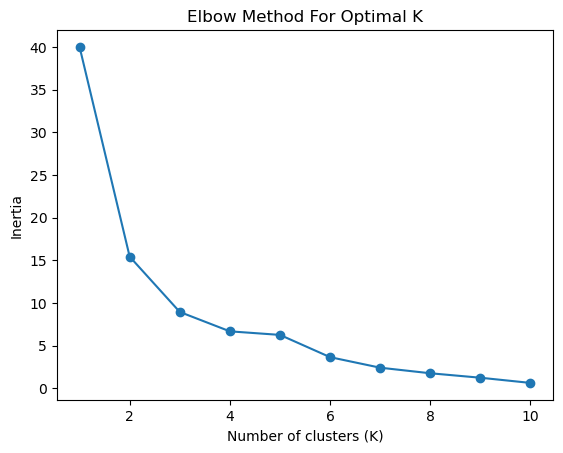

In [13]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Scaling the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df[['Accuracy(%)', 'Avg. Reaction Time(s)']])

# List to store inertia values
inertia = []

# Range of K values to test
K_range = range(1, 11)

# KMeans clustering for different values of K
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)  # Fit on scaled data
    inertia.append(kmeans.inertia_)

# Plotting the elbow method graph
plt.plot(K_range, inertia, marker='o')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal K')
plt.show()


In [14]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Scaling the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df[['Accuracy(%)', 'Avg. Reaction Time(s)']])

# Applying KMeans with 3 clusters (based on Elbow Method)
kmeans_3 = KMeans(n_clusters=3, random_state=42)
labels_3 = kmeans_3.fit_predict(X_scaled)

# Adding the cluster labels to the dataframe
df['Cluster'] = labels_3

# Display the dataframe with cluster labels
print(df)


    Accuracy(%)  Avg. Reaction Time(s)  Cluster
0          83.7                   1.32        2
1          85.1                   2.30        1
2          83.3                   2.64        1
3          97.5                   2.35        0
4          94.1                   1.81        0
5          89.0                   1.27        2
6          88.3                   1.79        2
7          98.4                   1.20        0
8          86.5                   2.65        1
9          90.0                   1.82        2
10         84.8                   2.56        1
11         89.6                   1.70        2
12         95.5                   1.38        0
13         83.2                   2.68        1
14         81.1                   2.05        1
15         96.1                   1.52        0
16         95.3                   1.31        0
17         86.0                   2.27        1
18         90.1                   1.78        2
19         93.7                   1.32  

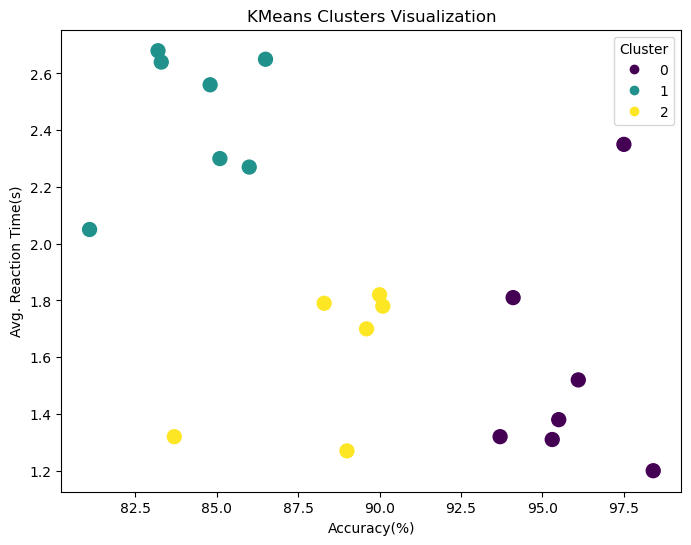

In [17]:
import matplotlib.pyplot as plt

# Create the scatter plot with clusters
plt.figure(figsize=(8, 6))
scatter = plt.scatter(df['Accuracy(%)'], df['Avg. Reaction Time(s)'], c=df['Cluster'], cmap='viridis', s=100)

# Set labels and title
plt.xlabel('Accuracy(%)')
plt.ylabel('Avg. Reaction Time(s)')
plt.title('KMeans Clusters Visualization')

# Add legend to the plot
plt.legend(*scatter.legend_elements(), title="Cluster")

# Show the plot
plt.show()


Accuracy of SVM classifier: 0.83


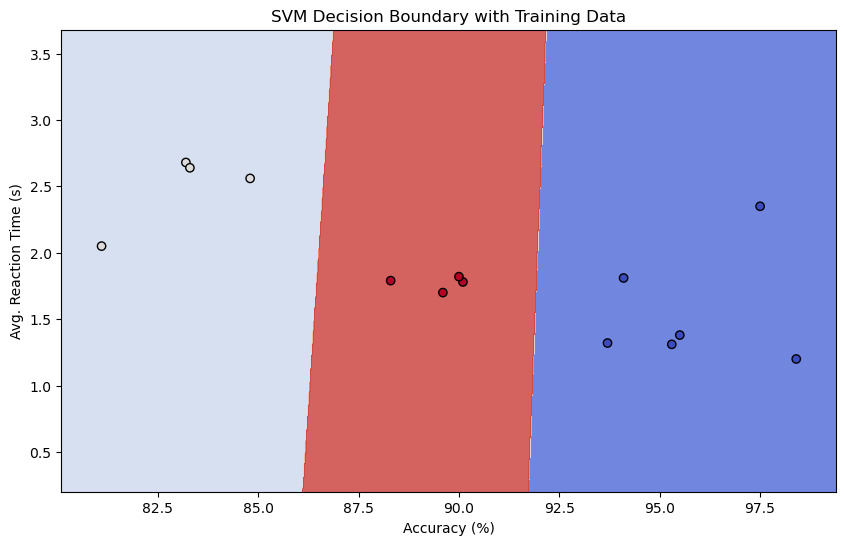

In [21]:
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


# Features (Accuracy and Avg. Reaction Time) and target (Cluster labels)
X = df[['Accuracy(%)', 'Avg. Reaction Time(s)']]
y = df['Cluster']  # KMeans cluster labels as target variable

# Train-test split (70% training, 30% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize SVM classifier with a linear kernel
clf = svm.SVC(kernel='linear', C=1.0)

# Fit the classifier to the training data
clf.fit(X_train, y_train)

# Make predictions on the test data
y_pred = clf.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of SVM classifier: {accuracy:.2f}")

# Optional: Visualize the decision boundary
# Create meshgrid for decision boundary visualization
x_min, x_max = X.iloc[:, 0].min() - 1, X.iloc[:, 0].max() + 1
y_min, y_max = X.iloc[:, 1].min() - 1, X.iloc[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

# Predict on the grid to plot the decision boundary
predict_grid = pd.DataFrame(np.c_[xx.ravel(), yy.ravel()], columns=X.columns)
Z = clf.predict(predict_grid)
Z = Z.reshape(xx.shape)

# Plot decision boundary and training data points
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
plt.scatter(X_train.iloc[:, 0], X_train.iloc[:, 1], c=y_train, cmap=plt.cm.coolwarm, edgecolors='k')
plt.xlabel('Accuracy (%)')
plt.ylabel('Avg. Reaction Time (s)')
plt.title('SVM Decision Boundary with Training Data')
plt.show()


In [27]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Predicting on the test data
y_pred = clf.predict(X_test)

# Calculate and print accuracy
accuracy = accuracy_score(y_test, y_pred)
print("--- Performance Metrics on Test Set ---")
print(f"Accuracy: {accuracy:.4f}")

# Classification report (precision, recall, f1-score)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


--- Performance Metrics on Test Set ---
Accuracy: 0.8333

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       0.75      1.00      0.86         3
           2       1.00      0.50      0.67         2

    accuracy                           0.83         6
   macro avg       0.92      0.83      0.84         6
weighted avg       0.88      0.83      0.82         6



C:\Users\prito\Desktop\project01\svm_confusion_matrix.jpg

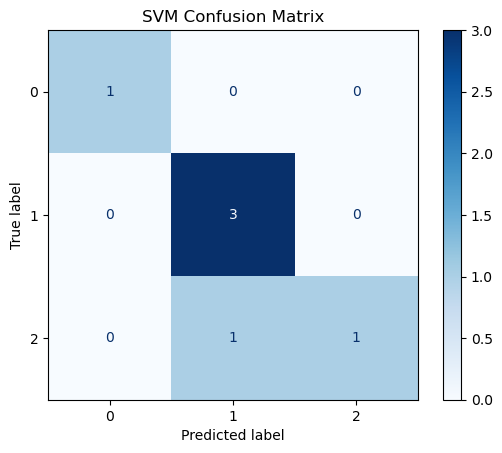

In [42]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Apply SVM with a linear kernel
svm = SVC(kernel='linear', random_state=42)
svm.fit(X_train, y_train)

# Predict on the test data
y_pred = svm.predict(X_test)

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display the confusion matrix
cm_display = ConfusionMatrixDisplay(cm).plot(cmap='Blues')
plt.title("SVM Confusion Matrix")

# Save the confusion matrix as a JPG image in the current directory
plt.savefig('svm_confusion_matrix.jpg', format='jpg')

# Provide a link to download the image (for Jupyter Notebooks)
from IPython.display import FileLink
FileLink('svm_confusion_matrix.jpg')


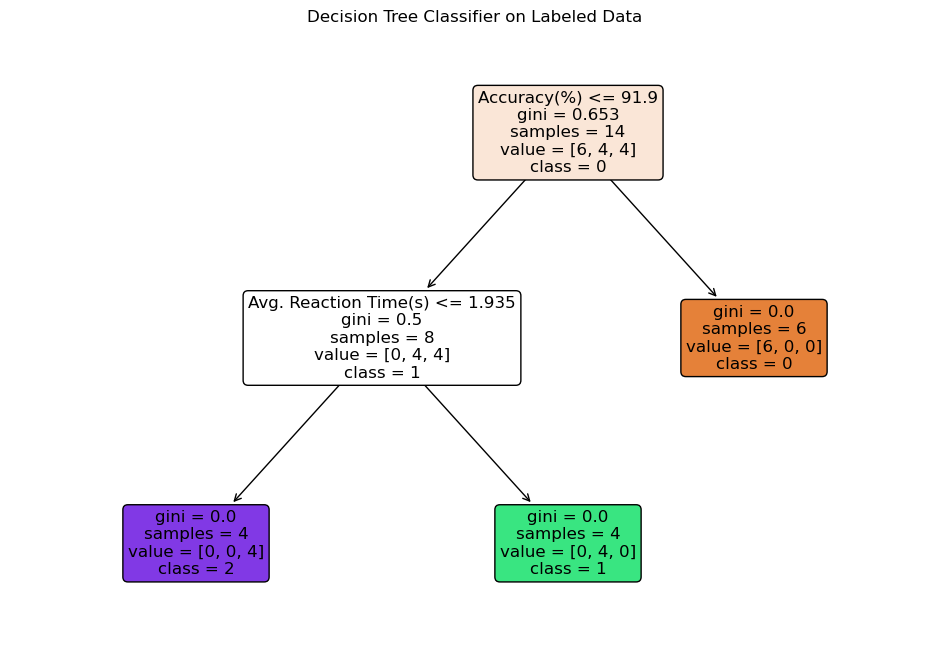


Decision Tree Accuracy on Test Data: 1.00


In [52]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split

# Define the target variable (Cluster labels) and the features (Accuracy and Reaction Time)
y = df['Cluster']  # Cluster labels as target
X = df[['Accuracy(%)', 'Avg. Reaction Time(s)']]  # Features: Accuracy and Avg. Reaction Time

# Split the data into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Apply Decision Tree classifier
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

# Predict on the test data
y_pred = dt.predict(X_test)

# Visualize the Decision Tree
plt.figure(figsize=(12, 8))
plot_tree(dt, filled=True, feature_names=['Accuracy(%)', 'Avg. Reaction Time(s)'],
          class_names=[str(i) for i in range(3)], rounded=True, fontsize=12)
plt.title("Decision Tree Classifier on Labeled Data")
plt.show()

# Evaluate the model by checking the accuracy
accuracy = dt.score(X_test, y_test)
print(f"\nDecision Tree Accuracy on Test Data: {accuracy:.2f}")


C:\Users\prito\Desktop\project01\decision_tree_confusion_matrix.jpg

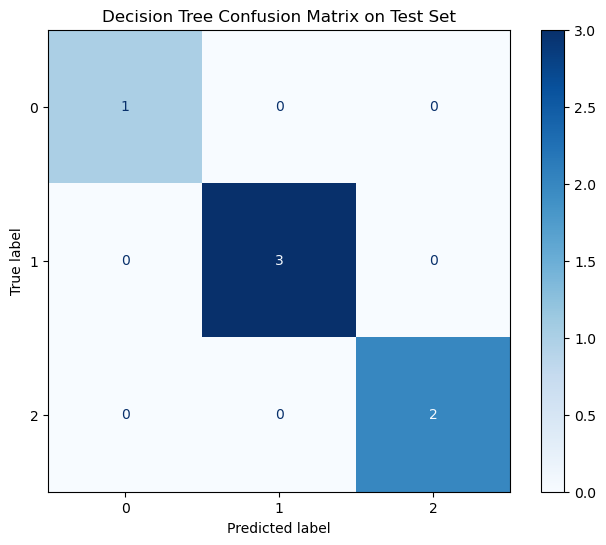

In [50]:
# Confusion Matrix for Decision Tree
cm_dt = confusion_matrix(y_test, y_pred_dt, labels=dt_clf.classes_)

# Display Confusion Matrix for Decision Tree
disp_dt = ConfusionMatrixDisplay(confusion_matrix=cm_dt, display_labels=dt_clf.classes_)
fig, ax = plt.subplots(figsize=(8, 6))
disp_dt.plot(cmap=plt.cm.Blues, ax=ax)
plt.title('Decision Tree Confusion Matrix on Test Set')

# Save the confusion matrix as a JPG image
plt.savefig('decision_tree_confusion_matrix.jpg', format='jpg')

# Provide a link to download the image
from IPython.display import FileLink
FileLink('decision_tree_confusion_matrix.jpg')

